# Quick UHPC (Novonix) file parser for John.

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
COLUMNS = ['Time', 'Cycle', 'Step', 'Current', 'Potential', 'Capacity', 'Prot_step']
UNITS = ['(h)', None, None, '(mA)', '(V)', '(mAh)', None]

In [3]:
srcpath = '../example_data'
uhpc_file = Path(srcpath) / 'MAB.210604.001.csv'

# Parse header
with open(uhpc_file, 'r') as f:
    headlines = []
    for i  in range(12):
        headlines.append(f.readline().strip().split())
        
cellname = headlines[1][-1]
mass = float(headlines[4][-1]) / 1000  # Convert mg to g
input_cap = float(headlines[5][-1]) / 1000  # Convert mAh to Ah
if headlines[10][0] == '[Data]':
    hlinenum = 11
    hline = headlines[10]
else:
    hlinenum = 12
    hline = headlines[11]

# Load csv into dataframe
df = pd.read_csv(uhpc_file, header=hlinenum)
# Add Prot.Step column if missing.
if hline[-4:] == 'Flag':
    df = df.rename(columns={'Flag':'Prot.Step'})
    i = df.Step
    df['Prot.Step'] = i.ne(i.shift()).cumsum() - 1

df.columns = COLUMNS

# Remove data where time is not increasing.   
t = df['Time'].values
dt = t[1:] - t[:-1]
inds = np.where(dt < 0.0)[0]
print('Indices being removed to time non-monotonicity: {}'.format(inds))
df = df.drop(inds+1)
inds = df.index[df['Potential'] < 0.0].tolist()
print('Indices being removed due to negative voltage: {}'.format(inds))
df = df.drop(inds)

Indices being removed to time non-monotonicity: [ 917  952 1254]
Indices being removed due to negative voltage: []


In [4]:
print(df.columns)

Index(['Time', 'Cycle', 'Step', 'Current', 'Potential', 'Capacity',
       'Prot_step'],
      dtype='object')


In [5]:
print(df['Step'].unique())
print(df['Prot_step'].unique())

[1 2 0]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147]


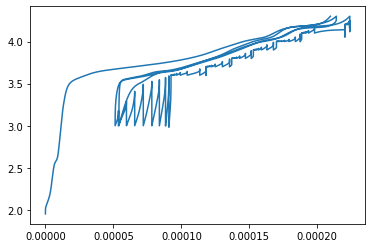

In [6]:
# Plot voltage vs capacity for all protocol steps.
plt.plot(df['Capacity'], df['Potential'])

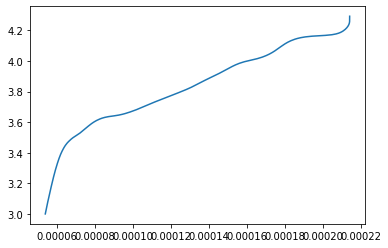

In [7]:
# Plot a single protocol step.
step_df = df.loc[df['Prot_step'] == 1]
plt.plot(step_df['Capacity'], step_df['Potential'])